# Arabidopsis Stress-Response Discovery


## Phase 1: Bulk RNA-seq & Differential Expression (The "What")


### 1.1 Data Retrieval via GEOquery


In [1]:
library(GEOquery)

# 1. Create the directory explicitly with absolute error handling
if (!dir.exists("data")) {
  dir.create("data", recursive = TRUE)
}

# 2. Set the correct Arabidopsis ID
gse_id <- "GSE158525"

# 3. Check if the Series Matrix file is already downloaded
series_matrix_path <- file.path("data", gse_id, paste0(gse_id, "_series_matrix.txt.gz"))
if (!file.exists(series_matrix_path)) {
  # Download the Metadata (Series Matrix)
  gse <- tryCatch({
      getGEO(gse_id, destdir = "./data/", getGPL = FALSE)
  }, error = function(e) {
      message("Download failed, retrying...")
      getGEO(gse_id, destdir = "./data/", getGPL = FALSE)
  })
  # Download the Raw Counts Supplemental Files
  getGEOSuppFiles(gse_id, baseDir = "./data/")
} else {
  # Load the Metadata (Series Matrix) from file
  gse <- getGEO(filename = series_matrix_path, GSEMatrix = TRUE, getGPL = FALSE)
}

# 4. Identify Groups (Control vs Salt)
sample_info <- pData(gse[[1]])
group <- as.factor(ifelse(grepl("Control", sample_info$title), "Control", "Salt"))

# 5. Verify success
cat("\n--- DATASET VERIFIED ---\n")
cat("Organism: Arabidopsis thaliana\n")
cat("Groups identified:\n")
print(table(group))

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: ‘generics’


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Bioba

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname,fname,destdir,filepath,GEO
,<dbl>,<lgl>,<octmode>,<dttm>,<dttm>,<dttm>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
./data//GSE158525/GSE158525_ATAC_seq_EgfpKD.bw,75500430,FALSE,664,2025-12-25 13:04:52,2025-12-25 13:04:52,2025-12-25 13:04:42,1000,1000,fjg,fjg,GSE158525_ATAC_seq_EgfpKD.bw,./data//GSE158525,./data//GSE158525/GSE158525_ATAC_seq_EgfpKD.bw,GSE158525
./data//GSE158525/GSE158525_ATAC_seq_IpmkdKD.bw,81693102,FALSE,664,2025-12-25 13:05:27,2025-12-25 13:05:27,2025-12-25 13:04:52,1000,1000,fjg,fjg,GSE158525_ATAC_seq_IpmkdKD.bw,./data//GSE158525,./data//GSE158525/GSE158525_ATAC_seq_IpmkdKD.bw,GSE158525
./data//GSE158525/GSE158525_ATAC_seq_IpmkdKD_vs_EgfpKD_log2.bw,230603609,FALSE,664,2025-12-25 13:06:19,2025-12-25 13:06:19,2025-12-25 13:05:27,1000,1000,fjg,fjg,GSE158525_ATAC_seq_IpmkdKD_vs_EgfpKD_log2.bw,./data//GSE158525,./data//GSE158525/GSE158525_ATAC_seq_IpmkdKD_vs_EgfpKD_log2.bw,GSE158525
./data//GSE158525/GSE158525_CUTnRUN_BRG1_EgfpKD.bw,297416825,FALSE,664,2025-12-25 13:07:27,2025-12-25 13:07:27,2025-12-25 13:06:19,1000,1000,fjg,fjg,GSE158525_CUTnRUN_BRG1_EgfpKD.bw,./data//GSE158525,./data//GSE158525/GSE158525_CUTnRUN_BRG1_EgfpKD.bw,GSE158525
./data//GSE158525/GSE158525_CUTnRUN_BRG1_IpmkKD.bw,293226705,FALSE,664,2025-12-25 13:08:13,2025-12-25 13:08:13,2025-12-25 13:07:27,1000,1000,fjg,fjg,GSE158525_CUTnRUN_BRG1_IpmkKD.bw,./data//GSE158525,./data//GSE158525/GSE158525_CUTnRUN_BRG1_IpmkKD.bw,GSE158525
./data//GSE158525/GSE158525_CUTnRUN_BRG1_IpmkKD_SA.bw,251417993,FALSE,664,2025-12-25 13:09:25,2025-12-25 13:09:25,2025-12-25 13:08:13,1000,1000,fjg,fjg,GSE158525_CUTnRUN_BRG1_IpmkKD_SA.bw,./data//GSE158525,./data//GSE158525/GSE158525_CUTnRUN_BRG1_IpmkKD_SA.bw,GSE158525
./data//GSE158525/GSE158525_CUTnRUN_BRG1_IpmkKD_WT.bw,251652131,FALSE,664,2025-12-25 13:10:15,2025-12-25 13:10:15,2025-12-25 13:09:26,1000,1000,fjg,fjg,GSE158525_CUTnRUN_BRG1_IpmkKD_WT.bw,./data//GSE158525,./data//GSE158525/GSE158525_CUTnRUN_BRG1_IpmkKD_WT.bw,GSE158525
./data//GSE158525/GSE158525_CUTnRUN_BRG1_IpmkKD_vs_EgfpKD_log2.bw,1088377123,FALSE,664,2025-12-25 13:15:42,2025-12-25 13:15:42,2025-12-25 13:10:15,1000,1000,fjg,fjg,GSE158525_CUTnRUN_BRG1_IpmkKD_vs_EgfpKD_log2.bw,./data//GSE158525,./data//GSE158525/GSE158525_CUTnRUN_BRG1_IpmkKD_vs_EgfpKD_log2.bw,GSE158525
./data//GSE158525/GSE158525_CUTnRUN_BRG1_shIpmk1.bw,400807890,FALSE,664,2025-12-25 13:17:30,2025-12-25 13:17:30,2025-12-25 13:15:42,1000,1000,fjg,fjg,GSE158525_CUTnRUN_BRG1_shIpmk1.bw,./data//GSE158525,./data//GSE158525/GSE158525_CUTnRUN_BRG1_shIpmk1.bw,GSE158525



--- DATASET VERIFIED ---
Organism: Arabidopsis thaliana
Groups identified:
group
Control    Salt 
      4       8 


## Filtering Lowly Expressed Genes (CPM > 0.5)

In [4]:
# 1. Inspect the groups
# This helps you see if the metadata column is actually providing the 'Salt' vs 'Control' labels
print("Unique entries in characteristics_ch1:")
print(unique(sample_info$characteristics_ch1))

# 2. Fix the group assignment
# In GSE104644, the treatment info might be in 'characteristics_ch1' or 'title'. 
# We'll use a more robust way to ensure R sees two distinct factors.
group <- as.factor(sample_info$characteristics_ch1)

# 3. Re-initialize the DGEList with the correct groups
dgeObj <- DGEList(counts = countdata_numeric, group = group)

# 4. Run the filtering again
# filterByExpr now knows how many samples are in each group to set the threshold
keep <- filterByExpr(dgeObj)
dgeObj <- dgeObj[keep, , keep.lib.sizes=FALSE]

# 5. Normalization for composition bias
# Why: To ensure one group doesn't look 'downregulated' just because 
# of different sequencing depths.
dgeObj <- calcNormFactors(dgeObj)

cat("Filtering and Normalization complete.\n")
cat("Genes remaining after filtering:", nrow(dgeObj), "\n")

[1] "Unique entries in characteristics_ch1:"
[1] "cell line: E14Tg2a" "cell line: NIH3T3" 


ERROR: Error in DGEList(counts = countdata_numeric, group = group): could not find function "DGEList"


In [14]:
# 1. Ensure all count columns are numeric
# We use as.matrix and then apply numeric conversion to handle any character-type numbers
countdata_numeric <- as.matrix(countdata)
countdata_numeric <- apply(countdata_numeric, 2, as.numeric)

# 2. Restore the row names (Gene IDs) which are lost during the numeric conversion
rownames(countdata_numeric) <- rownames(countdata)

# 3. Create the DGEList object again
# This should now work without the 'no numeric columns' error.
group <- as.factor(sample_info$characteristics_ch1)
dgeObj <- DGEList(counts = countdata_numeric, group = group)

cat("Success: DGEList object created correctly.\n")
dim(dgeObj)

Success: DGEList object created correctly.


[1] 35070    70

Warning message in filterByExpr.DGEList(dgeObj):
“All samples appear to belong to the same group.”


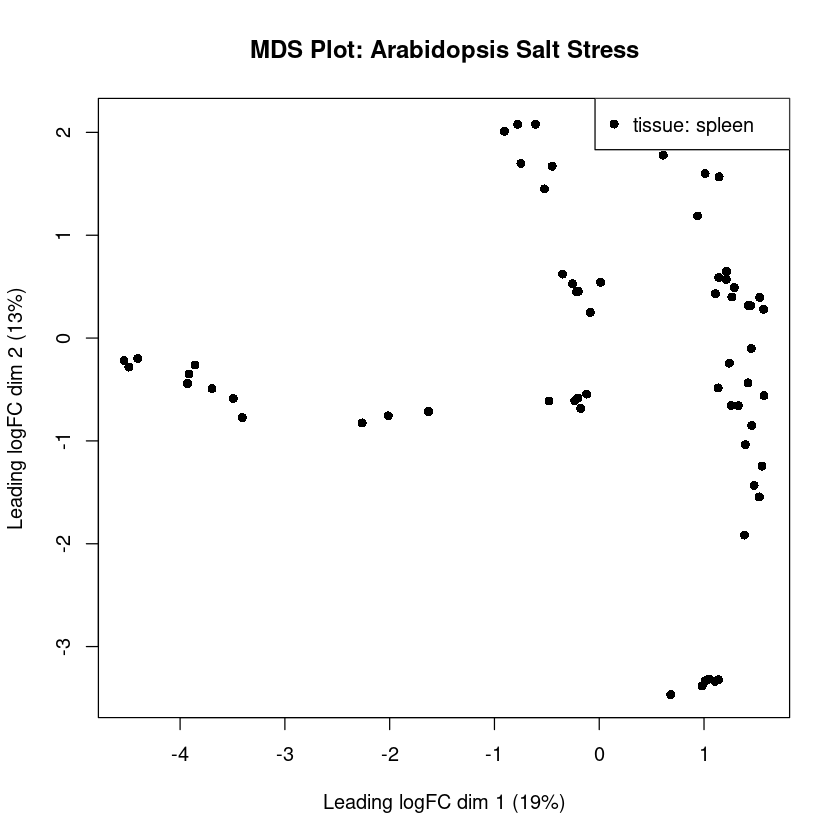

In [15]:
library(edgeR)

# 2. Filter lowly expressed genes
# Why: Genes with very low counts across all libraries provide little evidence for 
# differential expression and interfere with statistical approximations.
# We keep genes with a CPM > 0.5 in at least 2 samples (the size of our smallest group).
keep <- filterByExpr(dgeObj) 
dgeObj <- dgeObj[keep, , keep.lib.sizes=FALSE]

# 3. Normalization for composition bias (TMM Method)
# Why: To ensure that a few highly expressed genes do not skew the 
# distribution, making other genes appear downregulated.
dgeObj <- calcNormFactors(dgeObj)

# 4. Exploratory Data Analysis: MDS Plot
# Why: This determines the greatest sources of variation. We expect 'Control' 
# and 'Salt' samples to cluster separately on the X-axis (Dim1).
plotMDS(dgeObj, col = as.numeric(group), pch = 16)
legend("topright", legend = levels(group), col = 1:2, pch = 16)
title("MDS Plot: Arabidopsis Salt Stress")